In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Read the dataset
df = pd.read_csv('../data/credit_card_data.csv')

# Basic exploration
print(df.head())
print(df.columns.tolist())
print(df.isnull().sum())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [24]:
print("Statistical Summary:")
print(df.describe())

print("\nDataset Info:")
print(df.info())

Statistical Summary:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000

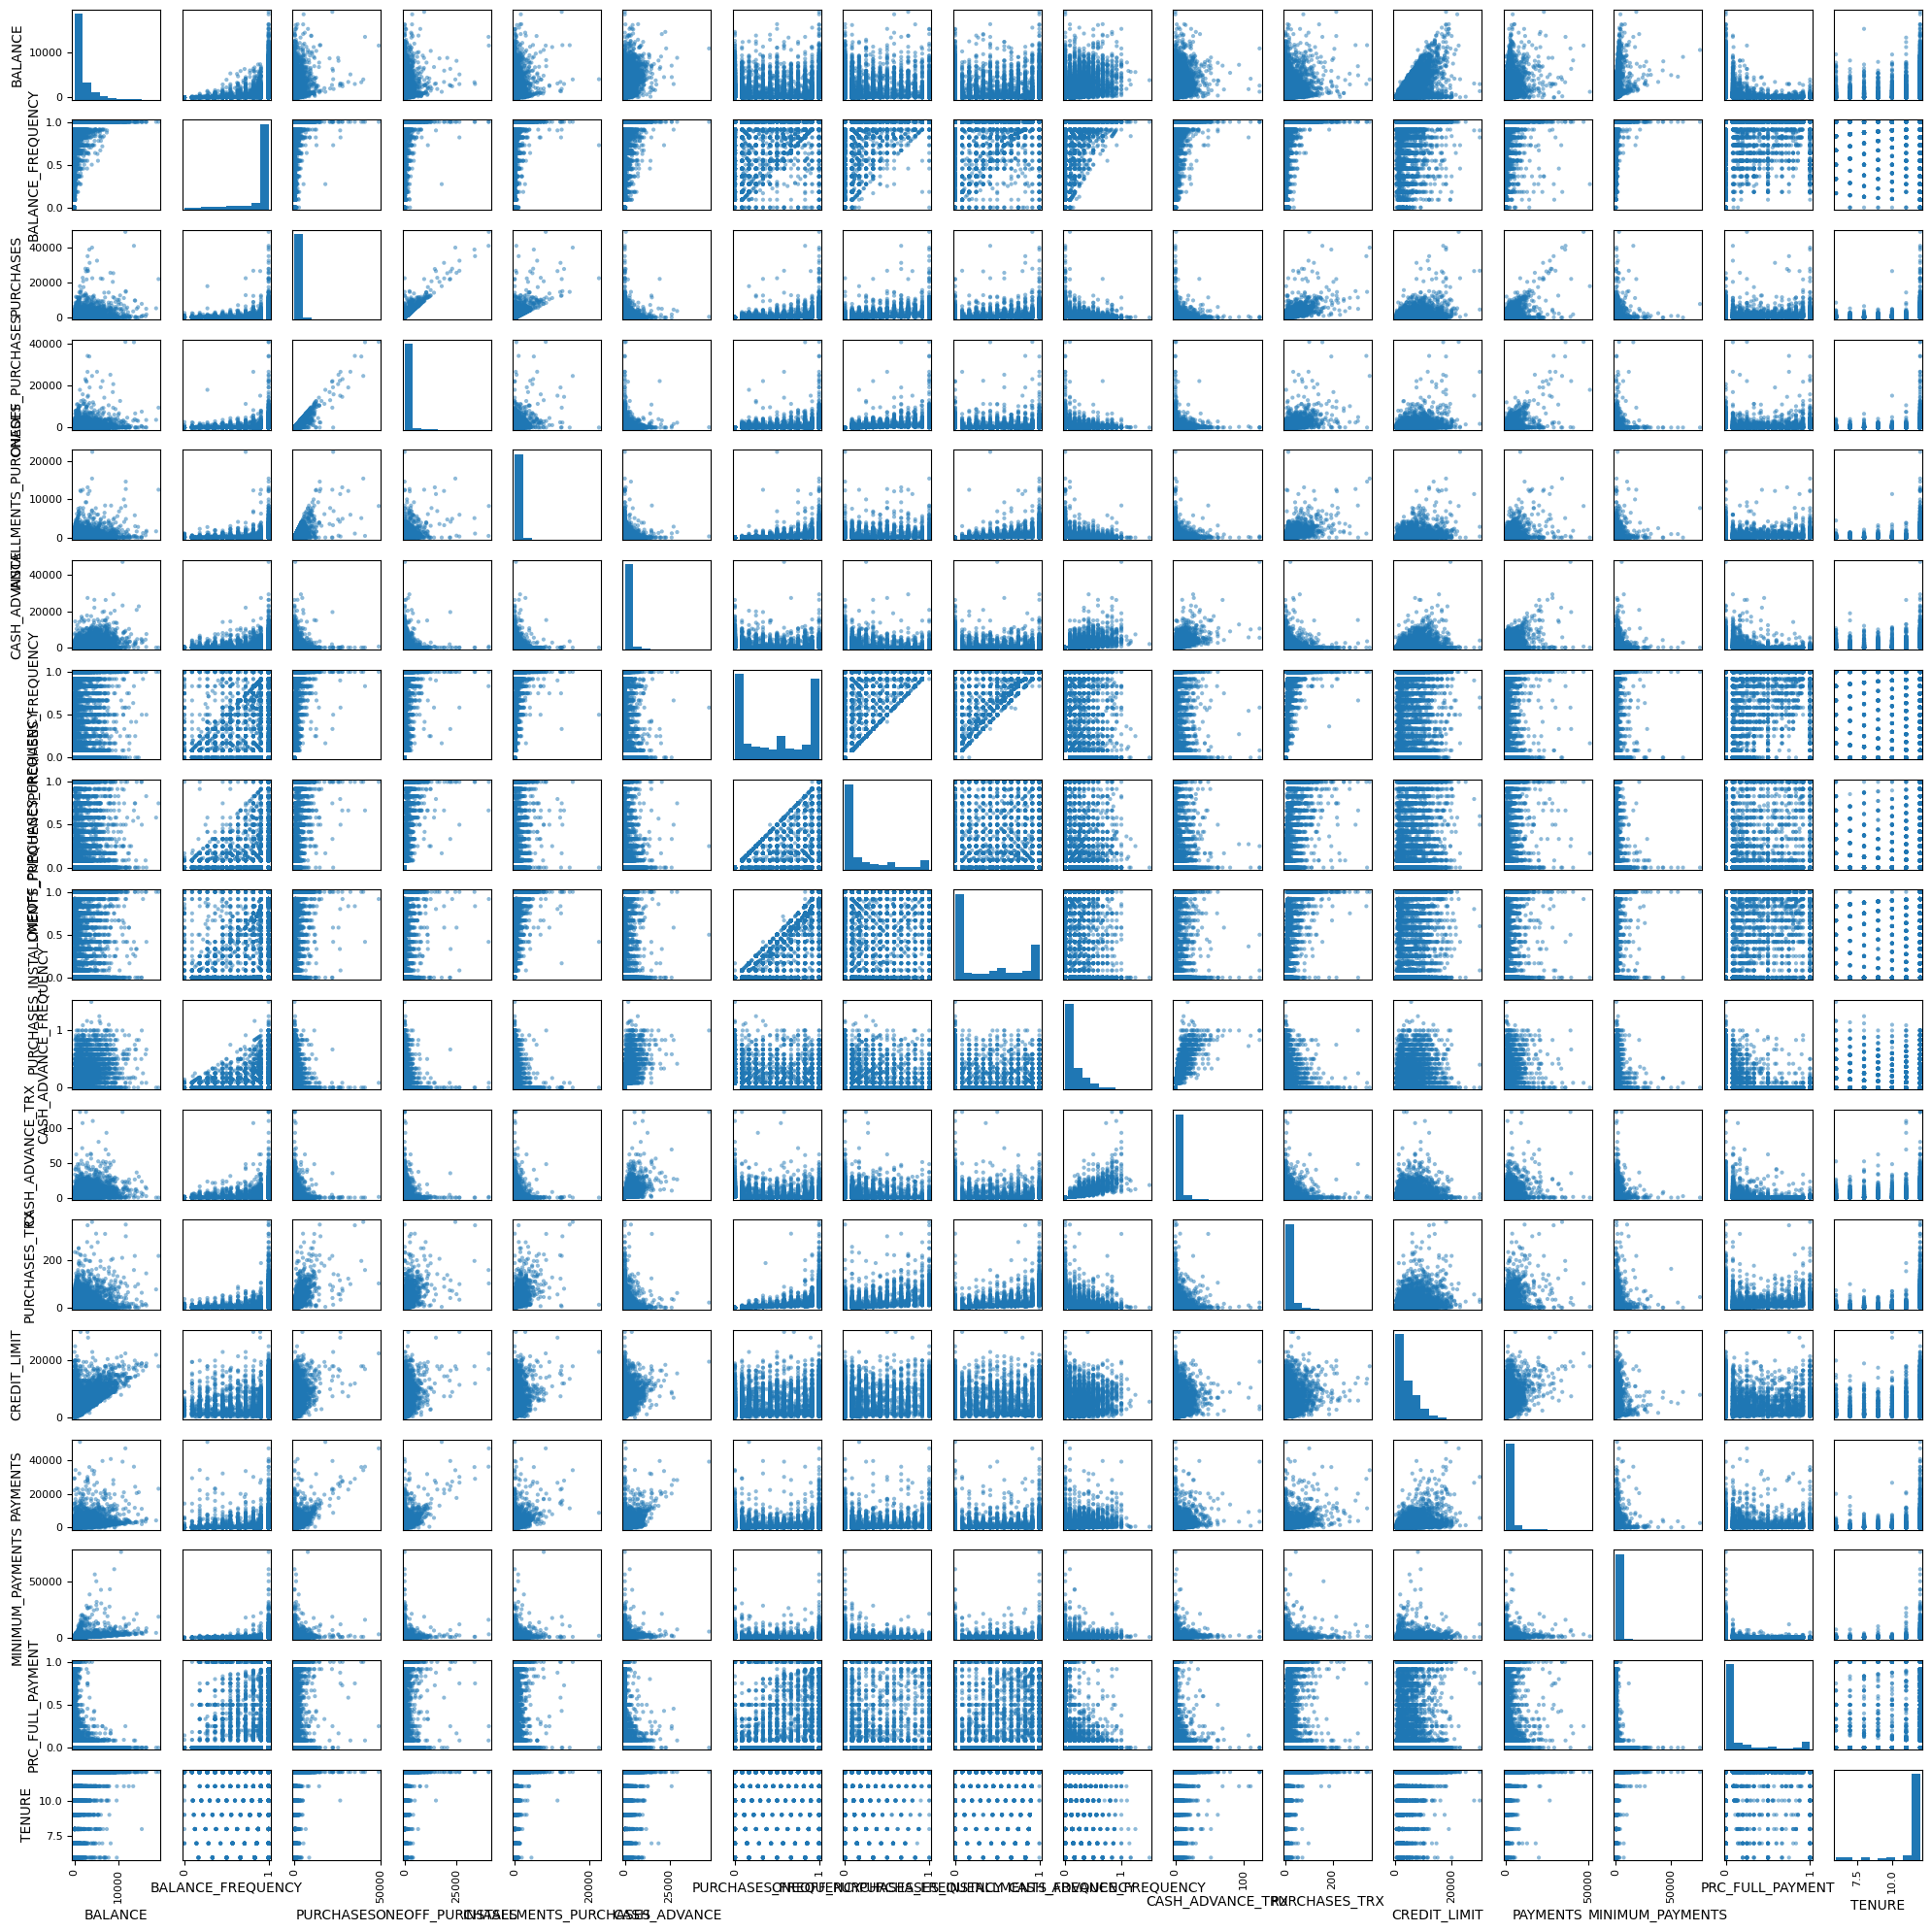

In [25]:
from pandas.plotting import scatter_matrix

# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
# Create scatter matrix plot
scatter_matrix(df[numeric_columns], figsize=(20, 20))
plt.tight_layout()
plt.show()

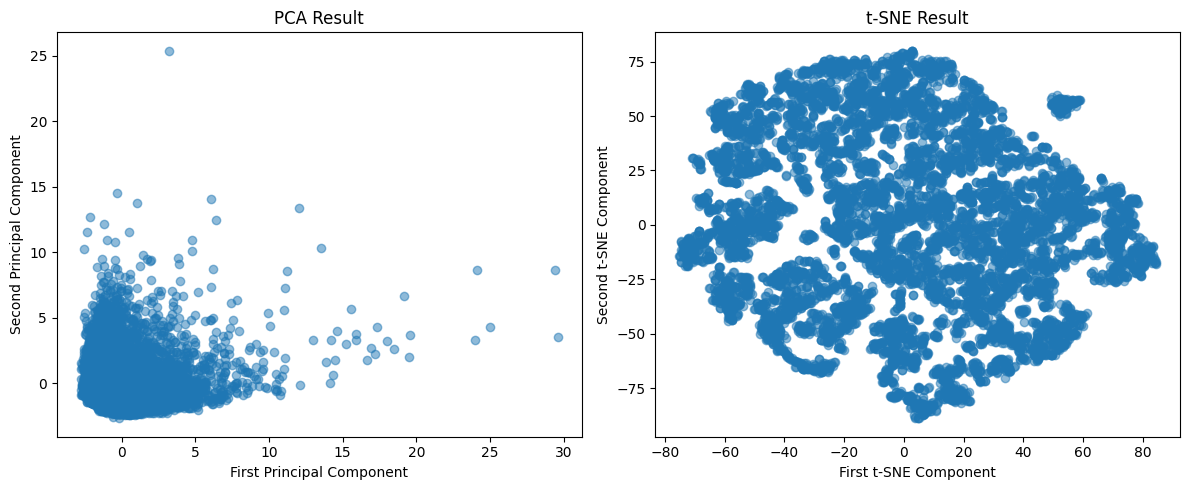

PCA explained variance ratio: [0.27290037 0.20301991]


In [26]:
# First, identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Handle missing values only for numeric columns
df_cleaned = df.copy()
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())

# Standardize only numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned[numeric_columns])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

# Plot results
plt.figure(figsize=(12, 5))

# PCA plot
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# t-SNE plot
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.title('t-SNE Result')
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')

plt.tight_layout()
plt.show()

# Print explained variance ratio for PCA
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

In [27]:
#partie2
from sklearn.cluster import KMeans

# KMeans with PCA features
kmeans_pca = KMeans(random_state=42)
pca_clusters = kmeans_pca.fit_predict(pca_result)

# KMeans with t-SNE features
kmeans_tsne = KMeans(random_state=42)
tsne_clusters = kmeans_tsne.fit_predict(tsne_result)

Elbow curve for PCA data:


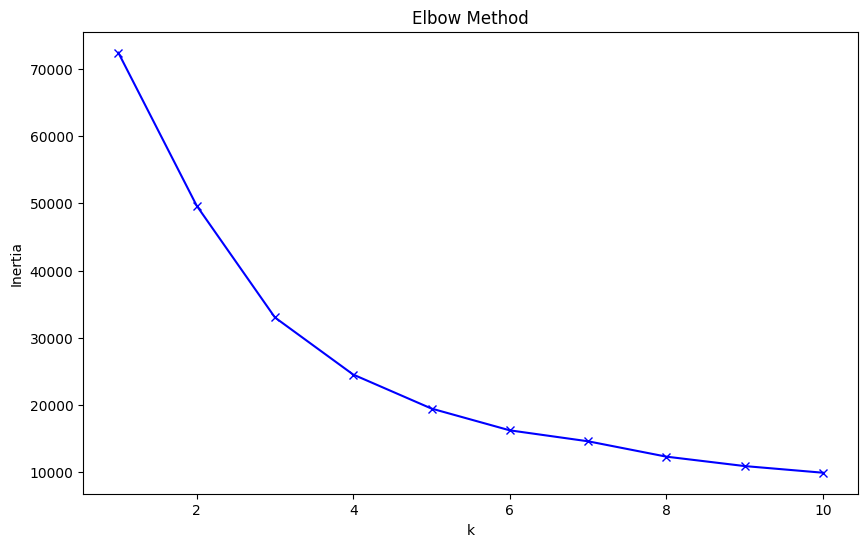


Elbow curve for t-SNE data:


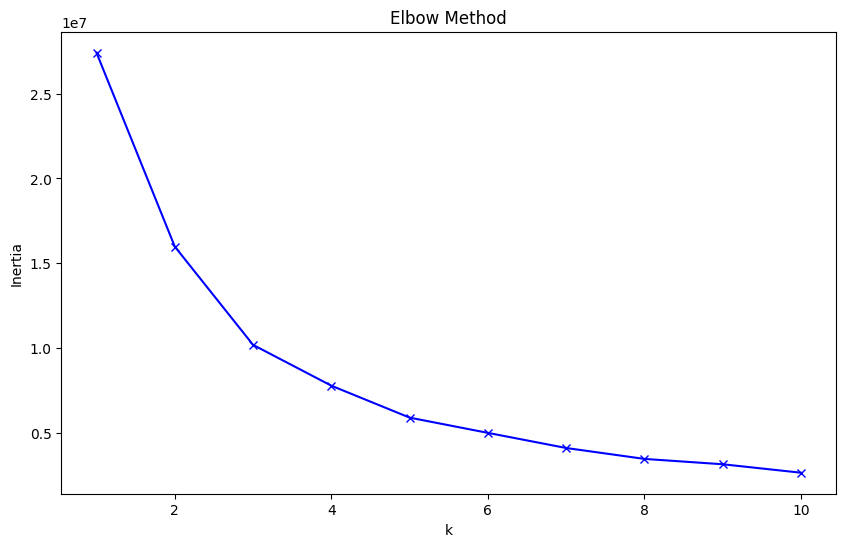

In [28]:
# Function to plot elbow curve
def plot_elbow(data, max_k=10):
    inertias = []
    
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k+1), inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

# Plot elbow curve for PCA data
print("Elbow curve for PCA data:")
plot_elbow(pca_result)

# Plot elbow curve for t-SNE data
print("\nElbow curve for t-SNE data:")
plot_elbow(tsne_result)

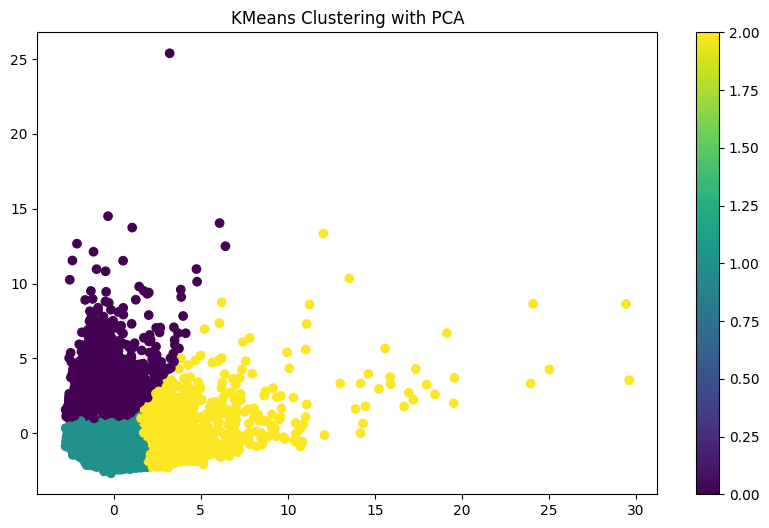

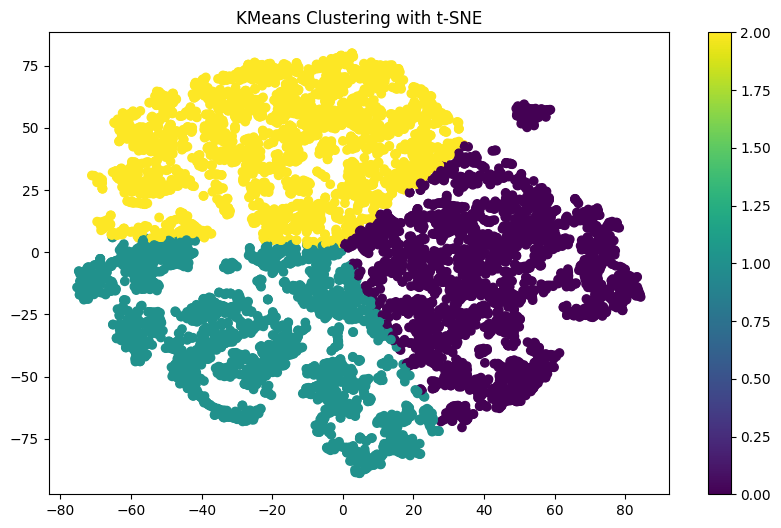

In [29]:
# Function to plot clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

# Plot clusters for optimal k (let's say k=3 for example - adjust based on elbow curve)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_clusters = kmeans_pca.fit_predict(pca_result)
plot_clusters(pca_result, pca_clusters, 'KMeans Clustering with PCA')

kmeans_tsne = KMeans(n_clusters=3, random_state=42)
tsne_clusters = kmeans_tsne.fit_predict(tsne_result)
plot_clusters(tsne_result, tsne_clusters, 'KMeans Clustering with t-SNE')

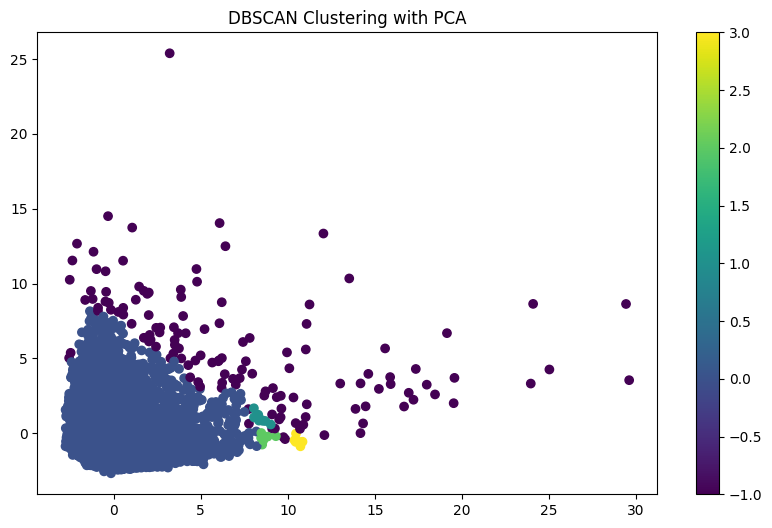

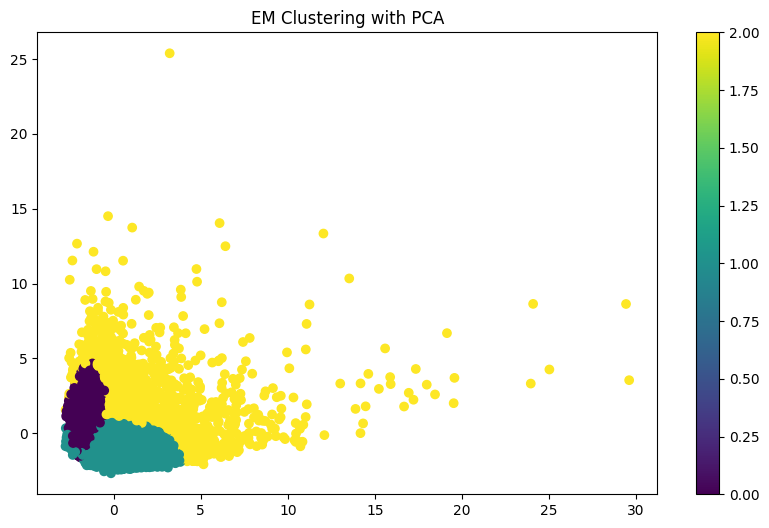

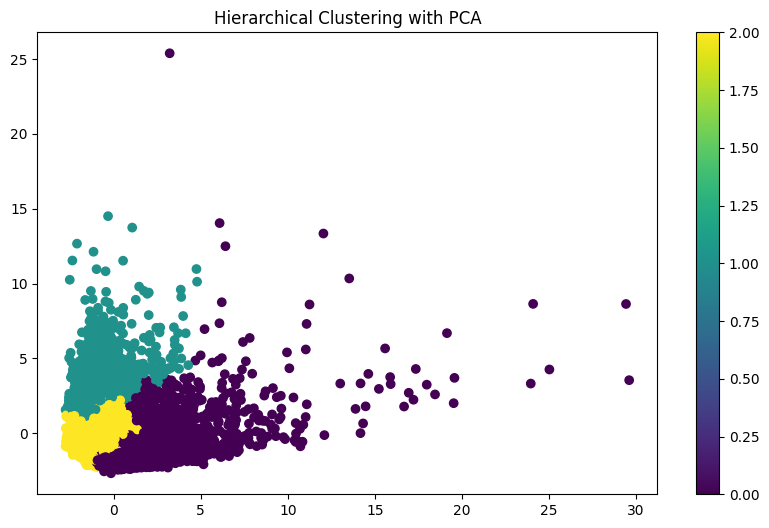

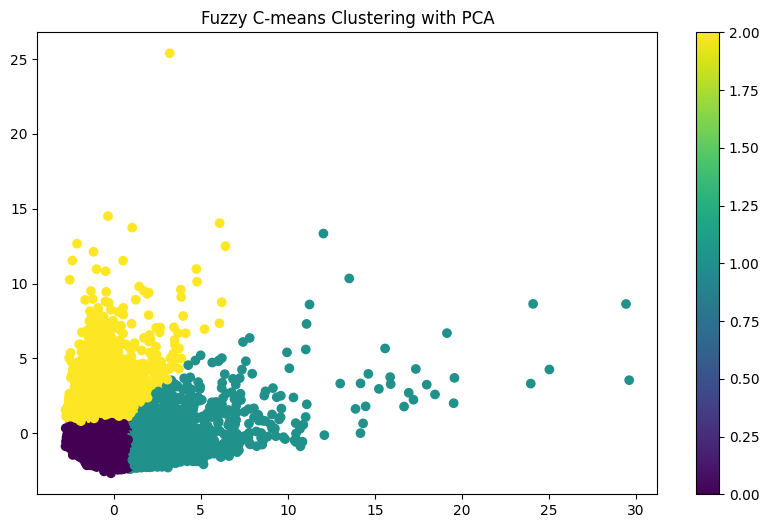

In [30]:
# Import required libraries
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import skfuzzy as fuzz

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters_pca = dbscan.fit_predict(pca_result)
plot_clusters(pca_result, dbscan_clusters_pca, 'DBSCAN Clustering with PCA')

# EM (Gaussian Mixture)
em = GaussianMixture(n_components=3, random_state=42)
em_clusters_pca = em.fit_predict(pca_result)
plot_clusters(pca_result, em_clusters_pca, 'EM Clustering with PCA')

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_clusters_pca = hierarchical.fit_predict(pca_result)
plot_clusters(pca_result, hierarchical_clusters_pca, 'Hierarchical Clustering with PCA')

# Fuzzy C-means
# Convert data to format required by skfuzzy
pca_data_transposed = pca_result.T
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(pca_data_transposed, c=3, m=2, error=0.005, maxiter=1000, init=None)
fcm_clusters = np.argmax(u, axis=0)
plot_clusters(pca_result, fcm_clusters, 'Fuzzy C-means Clustering with PCA')

In [31]:
from sklearn.metrics import silhouette_score

# Function to calculate silhouette score
def calculate_silhouette(data, labels):
    if len(np.unique(labels)) > 1:  # Silhouette score needs at least 2 clusters
        return silhouette_score(data, labels)
    return None

# Calculate silhouette scores for each method
scores = {
    'KMeans (PCA)': calculate_silhouette(pca_result, pca_clusters),
    'KMeans (t-SNE)': calculate_silhouette(tsne_result, tsne_clusters),
    'DBSCAN': calculate_silhouette(pca_result, dbscan_clusters_pca),
    'EM': calculate_silhouette(pca_result, em_clusters_pca),
    'Hierarchical': calculate_silhouette(pca_result, hierarchical_clusters_pca),
    'Fuzzy C-means': calculate_silhouette(pca_result, fcm_clusters)
}

# Print comparison
print("Silhouette Scores:")
for method, score in scores.items():
    print(f"{method}: {score}")

Silhouette Scores:
KMeans (PCA): 0.4490559347390311
KMeans (t-SNE): 0.39555418491363525
DBSCAN: 0.6267528096065229
EM: 0.33727799527196034
Hierarchical: 0.33823895572872115
Fuzzy C-means: 0.4098128491686202
